In [7]:
import random

import numpy as np
import matplotlib.pyplot as plt

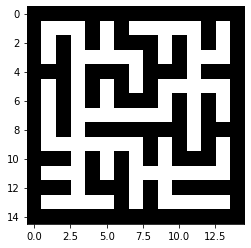

In [8]:
maze = np.loadtxt("sample_maze.txt")
plt.imshow(maze, cmap = "binary")

In [9]:
height, width = maze.shape

start = np.array([1, 1])
goal = np.array([width-2, height-2])

L = 100
gamma = 0.9
alpha = 0.1

actions = np.array([
    [1, 0],
    [-1, 0],
    [0, -1],
    [0, 1]
])

In [22]:
def TD(reward, Q, action, nextQmax):
    return reward + gamma*nextQmax - Q[action]

def get_reward(s, maze, action):
    place = s+action
    
    if all(s == goal) == 1:
        reward = 10 
    elif maze[place[0], place[1]] == 0:
        reward = 2
    elif maze[place[0], place[1]] == 1:
        reward = 0

    return reward

def next_Qmax(s, Q, action):
    place = s+action
    return Q[place[0], place[1]].max()

def updateQ(s, maze, Q, actions):
    for i in range(len(actions)):
        nextQmax = next_Qmax(s, Q, actions[i])
        reward = get_reward(s, maze, actions[i])
        Q[s[0], s[1], i] = Q[s[0], s[1], i] + alpha * TD(reward, Q[s[0], s[1]], i, nextQmax)

In [23]:
Q = np.zeros((height, width, len(actions)))

for _ in range(L):
    s = np.array([1, 1])
    for i in range(1000):
        updateQ(s, maze, Q, actions)

        #maxlist = [i for i, x in enumerate(Q[s[0], s[1]]) if x == max(Q[s[0], s[1]])]
        #action = maxlist[random.randint(0, len(maxlist)-1)]

        decide = random.randint(0, 3)
        s_next = s + actions[decide]
        if maze[s_next[0], s_next[1]] == 1:
            s = s
        else:
            s = s_next
    
    
print(s)
    

[7 1]


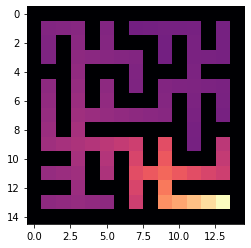

In [24]:
V = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        V[i, j] = Q[i, j].max()

plt.imshow(V, cmap = "magma")

In [25]:
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 23.34885279, 23.72095163, 24.13439616,  0.        ,
        23.34885363,  0.        , 21.01967184, 21.16225816, 21.33522285,
        21.52009128, 21.7217011 ,  0.        , 21.38615891,  0.        ],
       [ 0.        , 23.01396187,  0.        , 24.59377971,  0.        ,
        23.72094959,  0.        ,  0.        ,  0.        , 21.16077549,
         0.        , 21.94049333,  0.        , 21.55224259,  0.        ],
       [ 0.        , 22.71255271,  0.        , 25.10422024, 24.59378482,
        24.13439618, 23.72094851, 23.34885028,  0.        , 21.01677362,
         0.        , 22.18380006, 21.95964916, 21.7454429 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 25.67138974,  0.        ,
         0.        ,  0.        , 23.01395797, 